# 🧾 Step 1: Project Overview

In [ ]:
pip install pandas
pip install numpy
pip install seaborn
pip install matplotlib

SyntaxError: invalid syntax (ipython-input-59-532547928.py, line 1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer_Churn_Prediction_forTelNet_Communications.csv to Customer_Churn_Prediction_forTelNet_Communications.csv


# 📂 Step 2: Data Loading & Overview

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('Customer_Churn_Prediction_forTelNet_Communications.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1000 non-null   int64  
 1   Gender                         1000 non-null   object 
 2   Plan Type                      1000 non-null   object 
 3   Monthly Charge (INR)           1000 non-null   float64
 4   Data Usage (GB/Month)          1000 non-null   float64
 5   Call Minutes/Month             1000 non-null   float64
 6   Complaints (Last 6 Months)     1000 non-null   int64  
 7   Customer Support Calls         1000 non-null   int64  
 8   Late Payments (Last 6 Months)  1000 non-null   int64  
 9   Tenure (Months)                1000 non-null   int64  
 10  Received Competitor Offer      1000 non-null   int64  
 11  Churned (1=Yes, 0=No)          1000 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 

,Age,Monthly Charge (INR),Data Usage (GB/Month),Call Minutes/Month,Complaints (Last 6 Months),Customer Support Calls,Late Payments (Last 6 Months),Tenure (Months),Received Competitor Offer,"Churned (1=Yes, 0=No)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,43.336000,403.645800,15.148080,299.782860,0.957000,1.992000,1.473000,30.270000,0.185000,0.49000
std,14.851453,148.039163,4.933851,101.019368,0.977807,1.380522,1.111984,17.431206,0.388492,0.50015
min,18.000000,100.000000,1.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,31.000000,298.945000,11.755000,228.992500,0.000000,1.000000,0.000000,15.000000,0.000000,0.00000
50%,43.000000,407.775000,15.130000,300.580000,1.000000,2.000000,1.000000,30.000000,0.000000,0.00000
75%,57.000000,502.597500,18.807500,369.180000,1.000000,3.000000,2.000000,46.000000,0.000000,1.00000
max,69.000000,884.330000,28.710000,612.700000,5.000000,7.000000,3.000000,59.000000,1.000000,1.00000


# 📊 Step 3: Exploratory Data Analysis (EDA)

In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
Plan Type,0
Monthly Charge (INR),0
Data Usage (GB/Month),0
Call Minutes/Month,0
Complaints (Last 6 Months),0
Customer Support Calls,0
Late Payments (Last 6 Months),0
Tenure (Months),0


In [ ]:
df['Churned (1=Yes, 0=No)'].value_counts()

,count
"Churned (1=Yes, 0=No)",
0,510
1,490


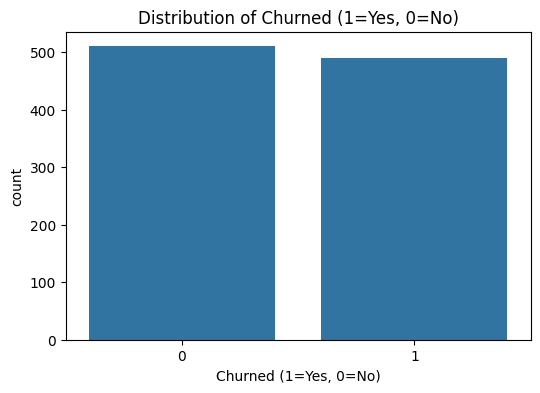

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Churned (1=Yes, 0=No)', data=df)
plt.title('Distribution of Churned (1=Yes, 0=No)')
plt.show()

# 🧼 Step 4: Data Preprocessing

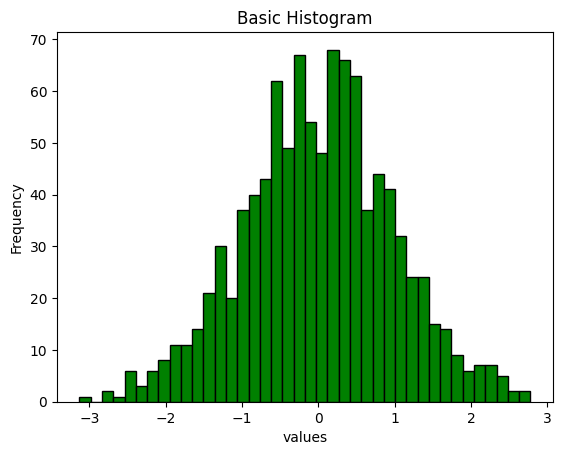

In [ ]:
# 1. Basic Histogram:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(1000)
plt.hist(data, bins=40, color='green', edgecolor='black')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
plt.show()

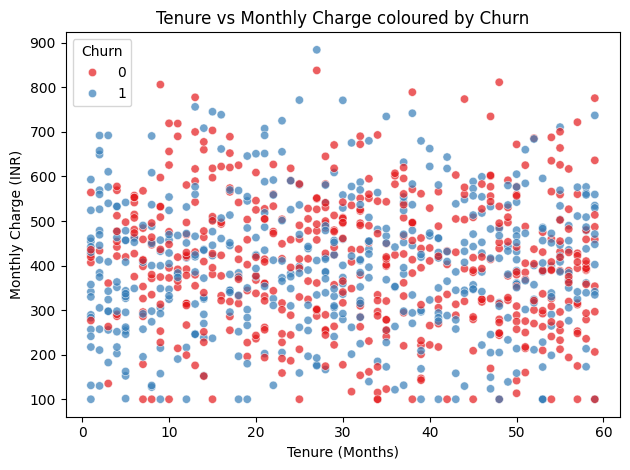

In [ ]:
# 2.  Scatter plot: Tenure vs Monthly Charge, coloured by churn
plt.figure()
sns.scatterplot(
    data=df,
    x="Tenure (Months)",
    y="Monthly Charge (INR)",
    hue="Churned (1=Yes, 0=No)",
    palette="Set1",
    alpha=0.7,
)
plt.title("Tenure vs Monthly Charge coloured by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charge (INR)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

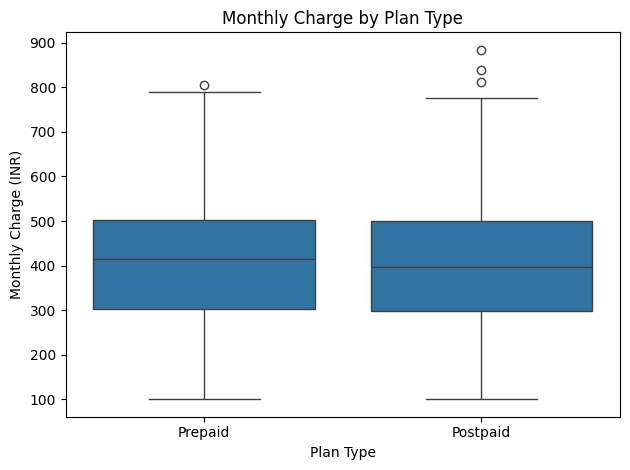

In [ ]:
# 3.  Box plot: Monthly Charge by Plan Type
plt.figure()
sns.boxplot(data=df, x="Plan Type", y="Monthly Charge (INR)")
plt.title("Monthly Charge by Plan Type")
plt.xlabel("Plan Type")
plt.ylabel("Monthly Charge (INR)")
plt.tight_layout()
plt.show()

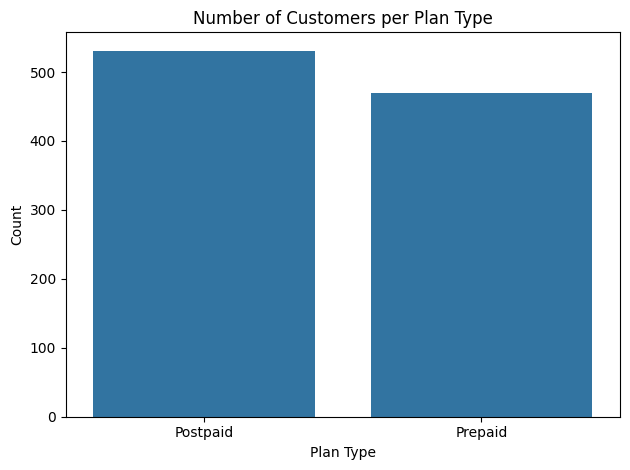

In [ ]:
# 4.  Bar chart: Customer count by Plan Type
plt.figure()
sns.countplot(
    data=df,
    x="Plan Type",
    order=df["Plan Type"].value_counts().index,
)
plt.title("Number of Customers per Plan Type")
plt.xlabel("Plan Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 🤖 Step 5: Model Building

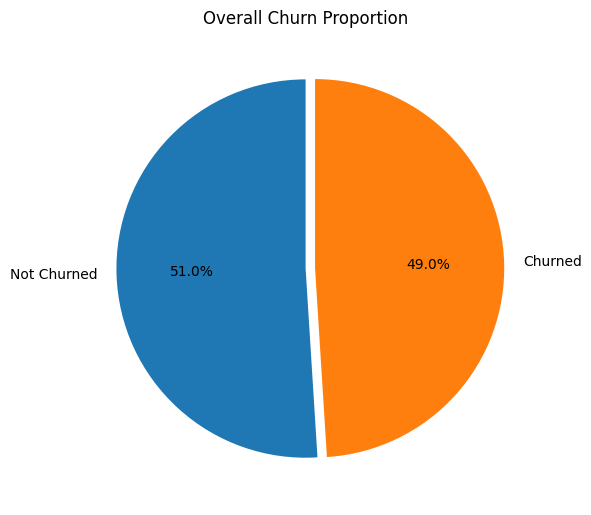

In [ ]:
# 5.  Pie chart: Churn vs Non‑Churn proportion
churn_counts = df["Churned (1=Yes, 0=No)"].value_counts().sort_index()
labels = ["Not Churned", "Churned"]   # 0 then 1

plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    explode=[0, 0.05],
)
plt.title("Overall Churn Proportion")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# 1. Load the raw dataset
df = pd.read_csv("Customer_Churn_Prediction_forTelNet_Communications.csv")
TARGET_COL = "Churned (1=Yes, 0=No)"

In [ ]:
# 2. Separate features (X) and label (y)
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

In [ ]:
# 3. Identify numeric & categorical columns automatically
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

print(f"Numeric columns: {list(numeric_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

Numeric columns: ['Age', 'Monthly Charge (INR)', 'Data Usage (GB/Month)', 'Call Minutes/Month', 'Complaints (Last 6 Months)', 'Customer Support Calls', 'Late Payments (Last 6 Months)', 'Tenure (Months)', 'Received Competitor Offer']
Categorical columns: ['Gender', 'Plan Type']


# 🧪 Step 6: Model Evaluation & Metrics

In [ ]:
# 4. Build preprocessing sub‑pipelines
numeric_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        (
            "encoder",
            OneHotEncoder(
                handle_unknown="ignore",       # unseen categories at inference OK
                # sparse=False,                  # dense output → easier to view # Removed sparse argument
            ),
        ),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols),
    ]
)

In [ ]:
# 5. Split into train / test BEFORE fitting the pre‑processor
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # keeps churn 0/1 ratio balanced in both splits
    random_state=42,
)

In [ ]:
# 6. Fit the pre‑processor on *train* only and transform
X_train_pp = preprocessor.fit_transform(X_train)
X_test_pp  = preprocessor.transform(X_test)

print("Shapes after pre‑processing →",
      f"X_train: {X_train_pp.shape},  X_test: {X_test_pp.shape}")

Shapes after pre‑processing → X_train: (800, 13),  X_test: (200, 13)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 💡 Step 7: Insights & Retention Strategies

In [ ]:
df = pd.read_csv("Customer_Churn_Prediction_forTelNet_Communications.csv")
TARGET_COL = "Churned (1=Yes, 0=No)"

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

numeric_pipeline = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())]
)

categorical_pipeline = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(handle_unknown="ignore"))] # Removed sparse=False
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols),
    ]
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_pp, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pp)
y_pred_proba = model.predict_proba(X_test_pp)[:, 1] # Probability of the positive class

In [ ]:
# Evaluate the model
print("Logistic Regression Model Evaluation:")
print("-" * 35)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Model Evaluation:
-----------------------------------
Accuracy: 0.9050
Precision: 0.8835
Recall: 0.9286
F1-Score: 0.9055
ROC AUC Score: 0.9747

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       102
           1       0.88      0.93      0.91        98

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200


Confusion Matrix:
[[90 12]
 [ 7 91]]
